<h2>Market Study - Food Industry Exports</h2>

<a href="https://openclassrooms.com/en/" >Openclassrooms</a>, Data Analyst Course
<br>Project 5 - Michael Orange

<hr>

A company in the food industry specialized in chicken is looking at expanding worldwide. All countries are considered. 
<br>The main objective is to provide the company with data ensuring it will collaborate with the most promising export market countries. 

Grouping countries in 'clusters' based on their similarity is required. 
<br>Default variables are: 
- population growth, 
- calory supply per capita 
- protein supply per capita, 
- prevalence of animal proteins in the mix. 

Additional relevant variable might be included (ex. GDP per capita)

<hr>

**Section 1** - [Import Datasets](#import)

**Section 2** - [Preparation](#preparation)
- [Data overview](#overview)
- [Transform data (Normalization)](#transform)

**Section 3** - [PCA - Principal Component Analysis](#pca) 
- [Number of components](#comp)
- [Hierarchical Clustering after PCA](#clustering)
- [Synthetic variables](#synth)
- [Correlation Circles](#circle)
- [Individuals factor map](#map)

**Section 4** - [Analysis of the clusters](#analysis) 
- [Exportation to European Union](#eu)
- [Exportation to large market](#largemarkets)
- [Exportation to growing markets](#growthmarkets)

**Section 5** - [Testing Hypothesis](#analysis) 
- [Shapiro test](#shapiro)
- [Kolmogorov-Smirnov test](#kstest)

<hr>

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import pylab 

import scipy.stats as stats
import scipy.cluster.hierarchy as hierarchy

from sklearn import preprocessing
from sklearn import decomposition

from display_pca import *

**Important note** 
<br>Analysis is based on 2017 data. Default year is 2017 for all below variables. 
<br>Growth variables are based on a comparaison between 2017 and 2013 (4 years delta). 

<h2>Import Datasets</h2><a id='import'></a>

In [2]:
#import 
data_country = pd.read_csv("data/output/data_country.csv")
data_country

,country,dom_supply_tons,food_supply_kcalcapitaday,protein_supply_gcapitaday,pop_thousand,pop_growth,gdp_percapita_usd,gdp_growth,political_stability_index,euro_union,...,import_poultry_tons,prod_poultry_tons,protein_poultry_gcapitaday,net_import_poultry_tons,net_import_poultry_over_domsupply,import_poultry_over_domsupply,prod_poultry_over_domsupply,export_poultry_over_domsupply,growth_import_poultry,growth_domsupply_poultry
0,Armenia,4383.0,3072.0,97.33,2944.791,1.629045,3078.978564,9.889928,-0.71,Outside EU,...,35000.0,11000.0,5.44,35000.0,74.468085,74.468085,23.404255,0.000000,9.375000,17.500000
1,Afghanistan,15139.0,1997.0,54.09,36296.113,12.477767,468.297893,-5.206857,-2.78,Outside EU,...,29000.0,28000.0,0.54,29000.0,50.877193,50.877193,49.122807,0.000000,-39.583333,-24.000000
2,Albania,4879.0,3400.0,119.50,2884.169,-0.675703,3347.701760,7.818559,0.40,Outside EU,...,38000.0,13000.0,6.26,38000.0,80.851064,80.851064,27.659574,0.000000,52.000000,11.904762
3,Algeria,45365.0,3345.0,92.85,41389.189,8.518733,3264.338962,-7.348644,-0.96,Outside EU,...,2000.0,275000.0,1.97,2000.0,0.722022,0.722022,99.277978,0.000000,-33.333333,-4.810997
4,Angola,32210.0,2266.0,54.09,29816.766,14.610305,2805.692595,-15.509934,-0.29,Outside EU,...,277000.0,42000.0,3.60,277000.0,86.833856,86.833856,13.166144,0.000000,-19.005848,-14.247312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Belgium,32221.0,3770.0,101.35,11419.748,2.382453,32988.016625,0.652140,0.42,EU,...,338000.0,463000.0,4.57,-318000.0,-209.210526,222.368421,304.605263,431.578947,34.126984,6.293706
168,Luxembourg,766.0,3334.0,105.79,591.910,9.095768,81059.319125,3.178482,1.34,EU,...,11000.0,0.0,7.19,10000.0,90.909091,100.000000,0.000000,9.090909,10.000000,0.000000
169,Serbia,14588.0,2799.0,82.43,8829.628,-1.000975,4580.333116,6.113513,0.10,Outside EU,...,12000.0,85000.0,3.50,5000.0,5.555556,13.333333,94.444444,7.777778,0.000000,-10.891089
170,Montenegro,821.0,3478.0,113.12,627.563,0.194462,5609.035115,11.469796,0.01,Outside EU,...,8000.0,4000.0,5.79,8000.0,80.000000,80.000000,40.000000,0.000000,14.285714,0.000000


In [3]:
data_country

,country,dom_supply_tons,food_supply_kcalcapitaday,protein_supply_gcapitaday,pop_thousand,pop_growth,gdp_percapita_usd,gdp_growth,political_stability_index,euro_union,...,import_poultry_tons,prod_poultry_tons,protein_poultry_gcapitaday,net_import_poultry_tons,net_import_poultry_over_domsupply,import_poultry_over_domsupply,prod_poultry_over_domsupply,export_poultry_over_domsupply,growth_import_poultry,growth_domsupply_poultry
0,Armenia,4383.0,3072.0,97.33,2944.791,1.629045,3078.978564,9.889928,-0.71,Outside EU,...,35000.0,11000.0,5.44,35000.0,74.468085,74.468085,23.404255,0.000000,9.375000,17.500000
1,Afghanistan,15139.0,1997.0,54.09,36296.113,12.477767,468.297893,-5.206857,-2.78,Outside EU,...,29000.0,28000.0,0.54,29000.0,50.877193,50.877193,49.122807,0.000000,-39.583333,-24.000000
2,Albania,4879.0,3400.0,119.50,2884.169,-0.675703,3347.701760,7.818559,0.40,Outside EU,...,38000.0,13000.0,6.26,38000.0,80.851064,80.851064,27.659574,0.000000,52.000000,11.904762
3,Algeria,45365.0,3345.0,92.85,41389.189,8.518733,3264.338962,-7.348644,-0.96,Outside EU,...,2000.0,275000.0,1.97,2000.0,0.722022,0.722022,99.277978,0.000000,-33.333333,-4.810997
4,Angola,32210.0,2266.0,54.09,29816.766,14.610305,2805.692595,-15.509934,-0.29,Outside EU,...,277000.0,42000.0,3.60,277000.0,86.833856,86.833856,13.166144,0.000000,-19.005848,-14.247312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Belgium,32221.0,3770.0,101.35,11419.748,2.382453,32988.016625,0.652140,0.42,EU,...,338000.0,463000.0,4.57,-318000.0,-209.210526,222.368421,304.605263,431.578947,34.126984,6.293706
168,Luxembourg,766.0,3334.0,105.79,591.910,9.095768,81059.319125,3.178482,1.34,EU,...,11000.0,0.0,7.19,10000.0,90.909091,100.000000,0.000000,9.090909,10.000000,0.000000
169,Serbia,14588.0,2799.0,82.43,8829.628,-1.000975,4580.333116,6.113513,0.10,Outside EU,...,12000.0,85000.0,3.50,5000.0,5.555556,13.333333,94.444444,7.777778,0.000000,-10.891089
170,Montenegro,821.0,3478.0,113.12,627.563,0.194462,5609.035115,11.469796,0.01,Outside EU,...,8000.0,4000.0,5.79,8000.0,80.000000,80.000000,40.000000,0.000000,14.285714,0.000000


In [4]:
#data with only the variables for PCA
data_pca = pd.read_csv("data/output/data_pca.csv")


In [5]:
#data_pca = data_pca.loc[data_pca['country'] != 'Belgium']
#data_pca = data_pca.loc[data_pca['country'] != 'Netherlands']
#data_pca = data_pca.loc[data_pca['country'] != 'China, Hong Kong SAR']
data_pca.set_index(['country'], inplace=True)

In [6]:
#sub dataframe of data_pca with only data related to poultry/chicken
sub_data_pca_poultry = pd.read_csv("data/output/data_pca_poultry.csv")
sub_data_pca_poultry.set_index(['country'], inplace=True)

In [7]:
#sub dataframe of data_pca with data NOT related to poultry/chicken
sub_data_pca_not_poultry = pd.read_csv("data/output/data_pca_not_poultry.csv")
sub_data_pca_not_poultry.set_index(['country'], inplace=True)

<hr>
<h2>Preparation</h2><a id='preparation'></a>

<h3>Data overview</h3>

- pop_growth = growth of the population (2103-2017)
- gdp_per_capita_usd = GDP per capita in USD (2017)
- political_stability_index = Index of the Political Stability and Absence of Violence (2017)

- food_supply_kcalcapitaday = Food supply in kcal/capita/day (2017)
- protein_supply_gcapitaday = Protein supply in g /capita/day (2017)
- protein_animal_over_protein = Food pourcentage of proteins from Animals over the total proteins (2017)
- growth_protein_animal_gcapitaday = growth of the protein animal per capita (2013-2017)

- protein_poultry_gcapitaday = protein supply from Poultry in g/capita/day (2017)
- prod_poultry_over_domsupply = Production Poultry over Domestic Supply Poultry (2017)
- net_import_poultry_over_domsupply = (Imports - Exports) over Domestic Supply Poultry (2017)
- growth_net_import_poultry = growth of the net imports of Poultry (2013-2017)
- growth_domsupply_poultry = growth of the domestic supply of Poultry (2013-2017)

In [8]:
sub_data_pca_not_poultry.describe()

,pop_growth,gdp_percapita_usd,political_stability_index,food_supply_kcalcapitaday,protein_supply_gcapitaday,protein_animal_over_protein,import_poultry_over_domsupply
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,5.475461,10567.131253,-0.060000,2858.395349,81.192907,42.695622,45.271209
std,5.016197,14523.104601,0.895993,454.544301,20.199063,15.991917,51.780631
min,-5.434483,287.166959,-2.960000,1754.000000,39.910000,8.912249,0.000000
25%,1.910891,1588.501797,-0.612500,2514.250000,64.212500,29.060776,4.059627
50%,4.755661,4467.101922,0.030000,2871.500000,81.390000,43.733922,24.255301
75%,9.093107,12088.189295,0.667500,3250.250000,96.445000,56.821064,80.212766
max,23.935417,81059.319125,1.590000,3770.000000,141.340000,73.331883,323.928571


In [9]:
sub_data_pca_poultry.describe()

,protein_poultry_gcapitaday,prod_poultry_over_domsupply,growth_import_poultry,growth_domsupply_poultry,net_import_poultry_over_domsupply
count,172.000000,172.000000,172.000000,172.000000,172.000000
mean,7.121279,76.207101,38.461577,11.611684,30.829599
std,5.603464,49.869887,127.448795,39.948279,54.807430
min,0.040000,0.000000,-100.000000,-100.000000,-217.741935
25%,2.165000,32.500000,-2.095147,0.000000,0.000000
50%,6.505000,86.499515,5.000000,7.263644,17.286325
75%,10.365000,100.000000,36.168864,19.232409,72.172986
max,27.870000,304.605263,900.000000,326.086957,220.000000


In [10]:
#sns.pairplot(sub_data_pca_not_poultry)

In [11]:
#sns.pairplot(sub_data_pca_poultry)

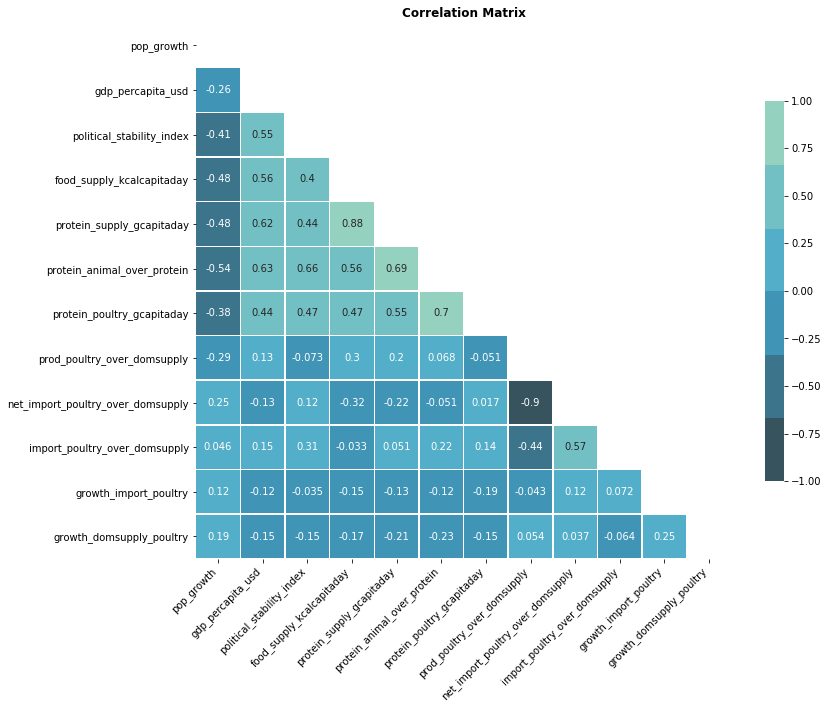

In [12]:
# Compute the correlation matrix
corr = data_pca.corr()
# Display correlation matrix
display_corr_matrix(corr)

In [13]:
#data_pca.drop('protein_poultry_gcapitaday', axis=1, inplace=True)
#data_pca.drop('import_poultry_over_domsupply', axis=1, inplace=True)
data_pca.drop('food_supply_kcalcapitaday', axis=1, inplace=True)
data_pca.drop('prod_poultry_over_domsupply', axis=1, inplace=True)
#data_pca.drop('growth_domsupply_poultry', axis=1, inplace=True)

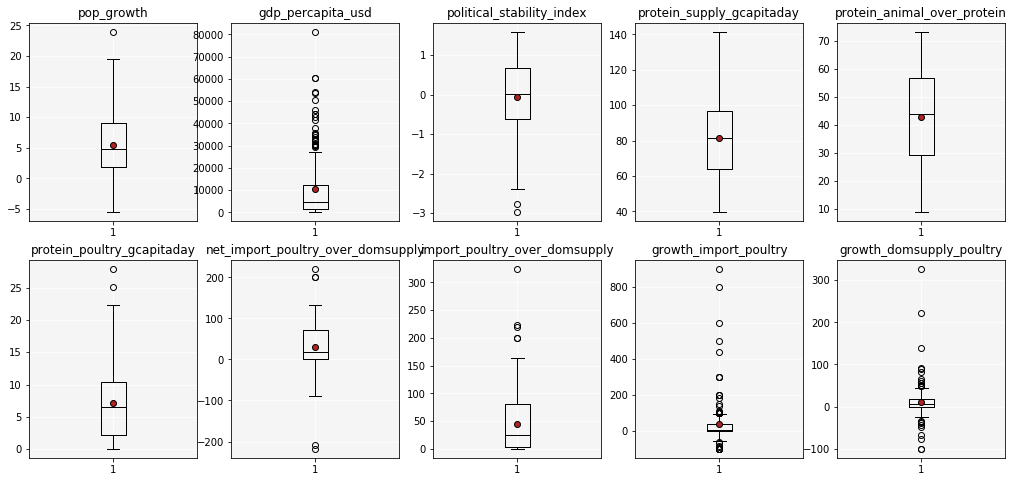

In [14]:
X = data_pca
display_multiple_boxplot(X, [(2,5)])

In [15]:
X.shape

(172, 10)

In [16]:
outlier_pop_growth = data_country.loc[data_country['pop_growth']>20]['country'].tolist()
outlier_gdp_percapita_usd = data_country.loc[data_country['gdp_percapita_usd']>80000]['country'].tolist()
outlier_prod_poultry_over_domsupply = data_country.loc[data_country['prod_poultry_over_domsupply']>250]['country'].tolist()
outlier_net_import_poultry_over_domsupply = data_country.loc[data_country['net_import_poultry_over_domsupply']<-200]['country'].tolist()
outlier_growth_import_poultry = data_country.loc[data_country['growth_import_poultry']>400]['country'].tolist()
outlier_growth_domsupply_poultry = data_country.loc[data_country['growth_domsupply_poultry']>200]['country'].tolist()

Significant outliers:

- **Population growth higher than 20%** : {{outlier_pop_growth}}
- **GDP per capita higher than 80 000** : {{outlier_gdp_percapita_usd}}


- **Production of Poultry at least 200% higher than internal consumption** : {{outlier_prod_poultry_over_domsupply}} 
- **Net Import (Import - Export) of Poultry at least 300% higher than internal consumption** : {{outlier_net_import_poultry_over_domsupply}} 
- **Growth of the Domestic Supply of Poultry at least 200% higher than internal consumption** : {{outlier_growth_domsupply_poultry}} 




<h3>Transform data (Normalization)</h3><a id='transform'></a>

In [17]:
X = data_pca.values
names = data_pca.index
features = data_pca.columns
print(X.shape)

(172, 10)


In [18]:
#number of observations
n = X.shape[0]
# number of variables
p = X.shape[1]

In [19]:
# Standardization and reduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

<hr>
<h2>Principal Component Analysis</h2><a id='pca'></a>

In [20]:
# PCA
pca = decomposition.PCA(n_components=p)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<h3>Number of components</h3><a id='comp'></a>

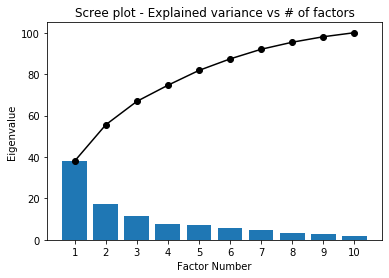

In [21]:
# Scree plot
display_scree_plot(pca)

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis).

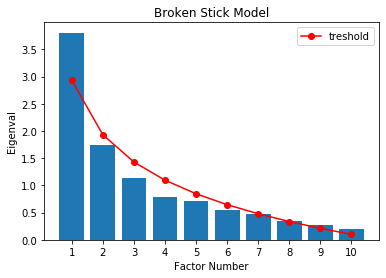

In [22]:
display_broken_sticks_plot(pca, n)

In [23]:
n_comp = 3

In [24]:
# PCA
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

X_projected = pca.transform(X_scaled)

<h3>Clustering after PCA</h3><a id='clustering'></a>

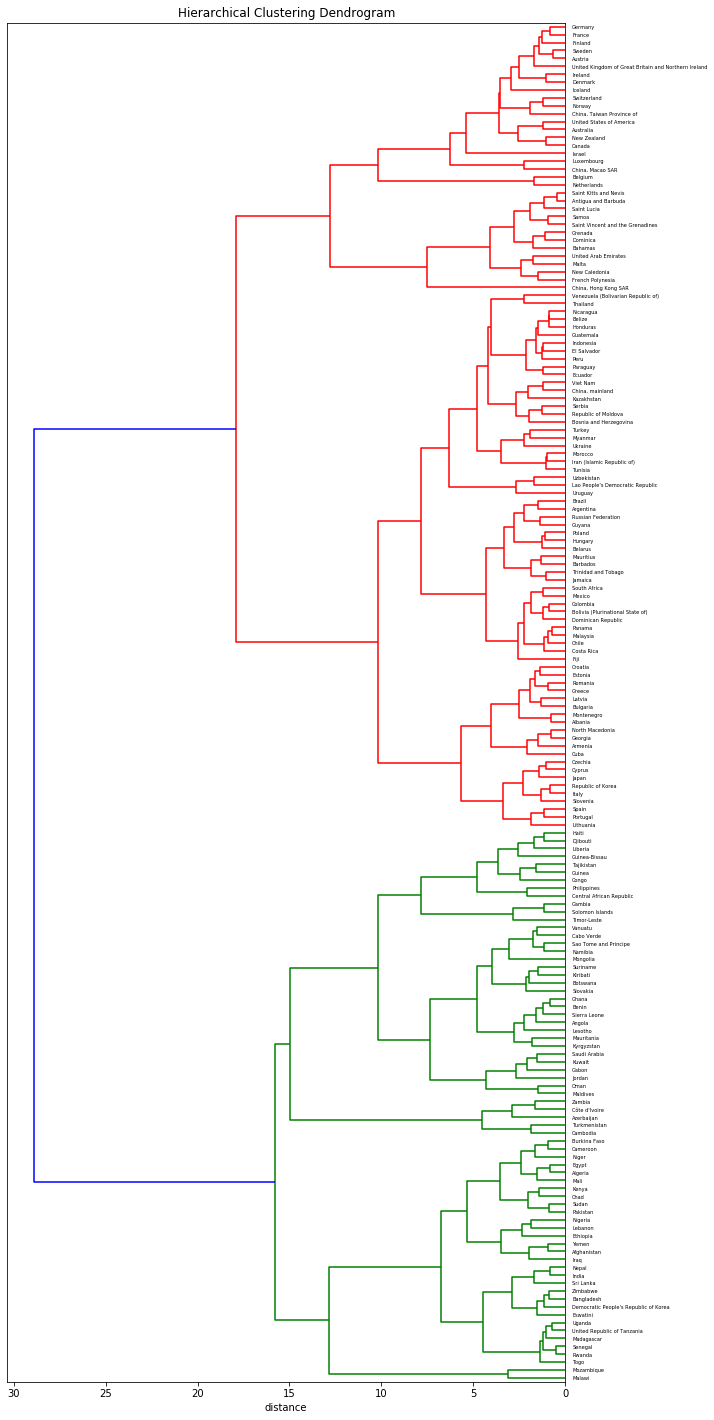

In [25]:
# Clustering hiérarchique
Z = hierarchy.linkage(X_scaled, 'ward')

#dendogram
plot_dendrogram(Z, names)

In [26]:
num_clusters = 9

In [27]:
clusters = hierarchy.fcluster(Z, num_clusters, criterion='maxclust')

In [28]:
df_cluster = pd.DataFrame(clusters)
df_cluster.columns = ['cluster']
df_cluster.index=names

In [29]:
df_cluster.reset_index().pivot_table(index='cluster', values='country', aggfunc=len)

,country
cluster,
1,2
2,29
3,5
4,34
5,21
6,47
7,13
8,2
9,19


<h3>Synthetic variables</h3><a id='synth'></a>

In [30]:
# data frame with new synthetic variables
df_X_projected = pd.DataFrame(X_projected, index=names, columns=['F'+str(i+1) for i in range(n_comp)])
df_X_projected = pd.concat([df_X_projected, df_cluster], axis=1)
df_X_projected.reset_index(inplace=True, col_level=-1)
first_col = df_X_projected.pop('country')
df_X_projected.insert(len(df_X_projected.columns), 'country', first_col)
df_X_projected

,F1,F2,F3,cluster,country
0,0.100014,0.405339,-0.243342,5,Armenia
1,-3.376208,-0.216970,-1.855950,2,Afghanistan
2,1.525940,0.692394,0.188337,5,Albania
3,-1.264301,-1.320648,-0.678998,2,Algeria
4,-1.872343,1.477251,-1.456635,4,Angola
...,...,...,...,...,...
167,2.307921,-0.849954,0.628312,8,Belgium
168,3.496852,1.763541,0.289224,9,Luxembourg
169,0.362713,-1.059543,-0.322449,6,Serbia
170,1.432877,0.581612,-0.256561,5,Montenegro


In [31]:
# composition of the synthetic variables
F_composition = {}
for k in range(n_comp):
    F_composition['F{}'.format(k+1)] = {}
    for n in range(p):
        F_composition['F{}'.format(k+1)].update({data_pca.columns[n]: pca.components_[k][n]})
pd.DataFrame(F_composition)

,F1,F2,F3
pop_growth,-0.325407,0.213544,-0.078854
gdp_percapita_usd,0.384780,0.006665,0.127554
political_stability_index,0.382970,0.221686,0.103287
protein_supply_gcapitaday,0.417472,-0.131334,0.108317
protein_animal_over_protein,0.466815,0.049960,0.074517
protein_poultry_gcapitaday,0.388666,0.045262,0.001333
net_import_poultry_over_domsupply,-0.055034,0.657810,-0.163676
import_poultry_over_domsupply,0.109291,0.631466,-0.132843
growth_import_poultry,-0.114986,0.216333,0.681525
growth_domsupply_poultry,-0.167130,0.071785,0.663809


<h3>Correlation circles</h3><a id='circle'></a>

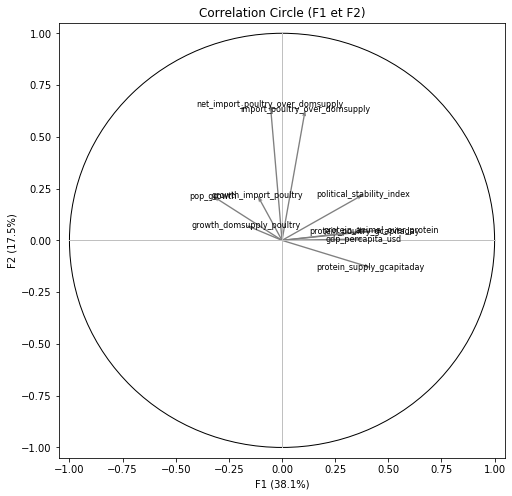

In [32]:
# Correlation Circle F1 and F2
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))
#display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features), lims=(-0.2,0.45,-0.1,0.7))

F1: Level of development
<br>F2 : Population growth

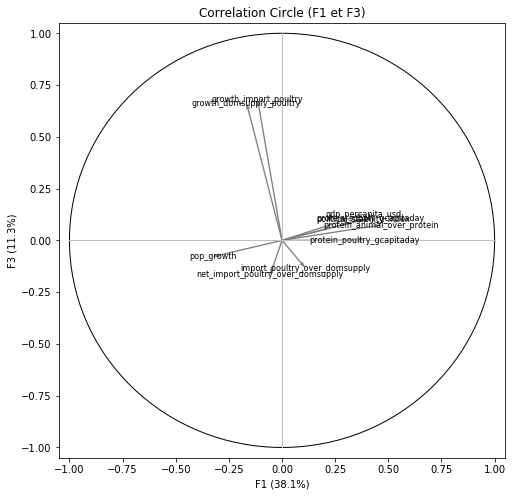

In [33]:
display_circles(pcs, n_comp, pca, [(0,2)], labels = np.array(features))

In [34]:
display_circles(pcs, n_comp, pca, [(2,3)], labels = np.array(features))

F1: Level of development
<br>F2 : Consumption of animals per capita

<h3>Individuals factor map</h3><a id='map'></a>

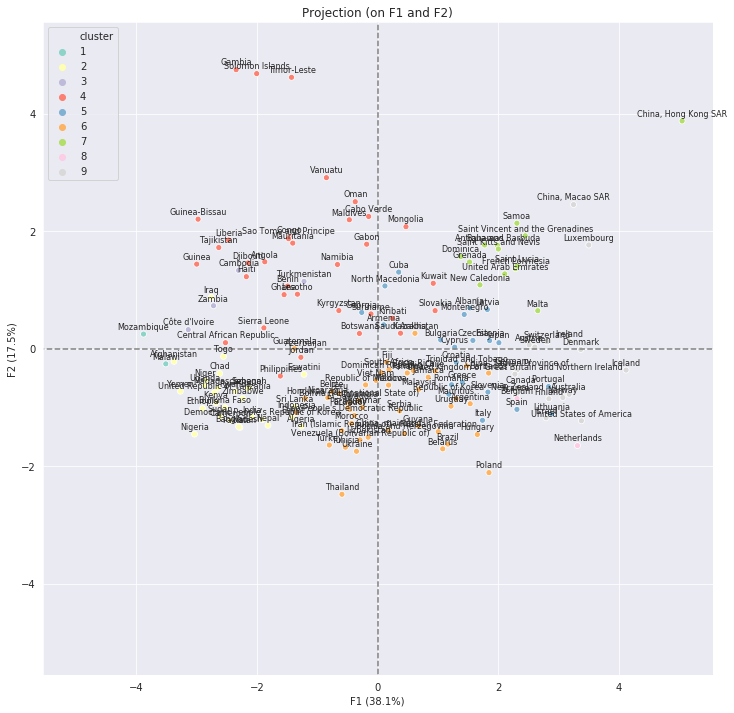

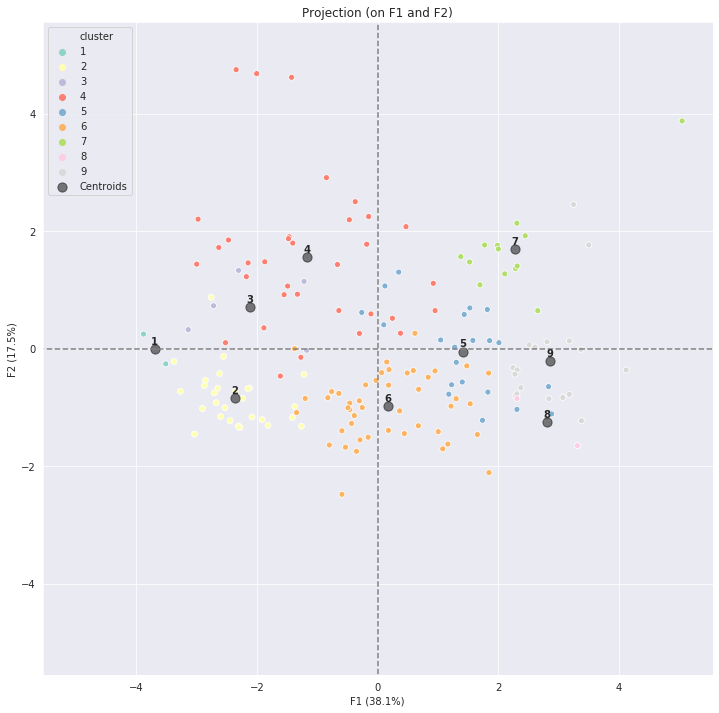

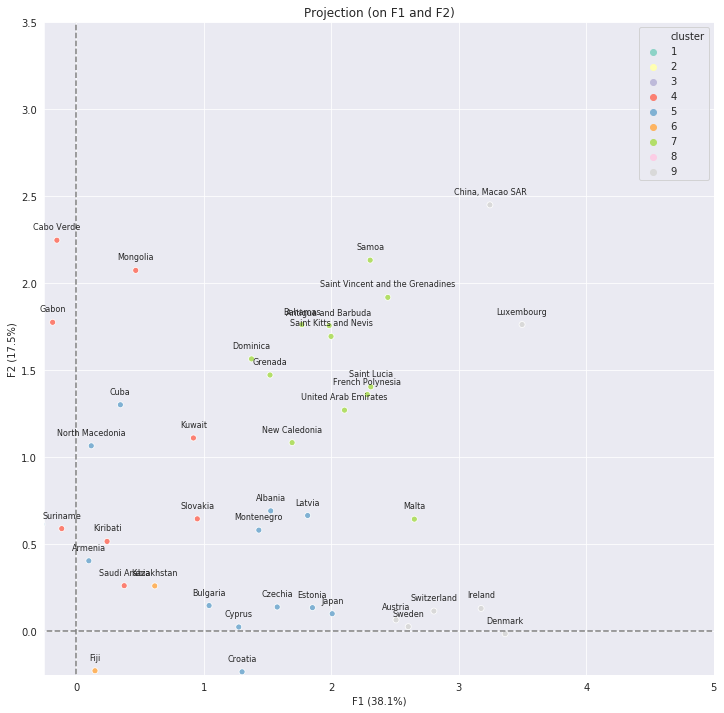

In [35]:
display_factorial_planes(X_projected, n_comp, pca,[(0,1)], labels=names, illustrative_var=df_X_projected.cluster)
display_factorial_planes(X_projected, n_comp, pca,[(0,1)], illustrative_var=df_X_projected.cluster)
display_factorial_planes(X_projected, n_comp, pca,[(0,1)], labels=names, illustrative_var=df_X_projected.cluster, lims=(-0.25,5,-0.25,3.5))

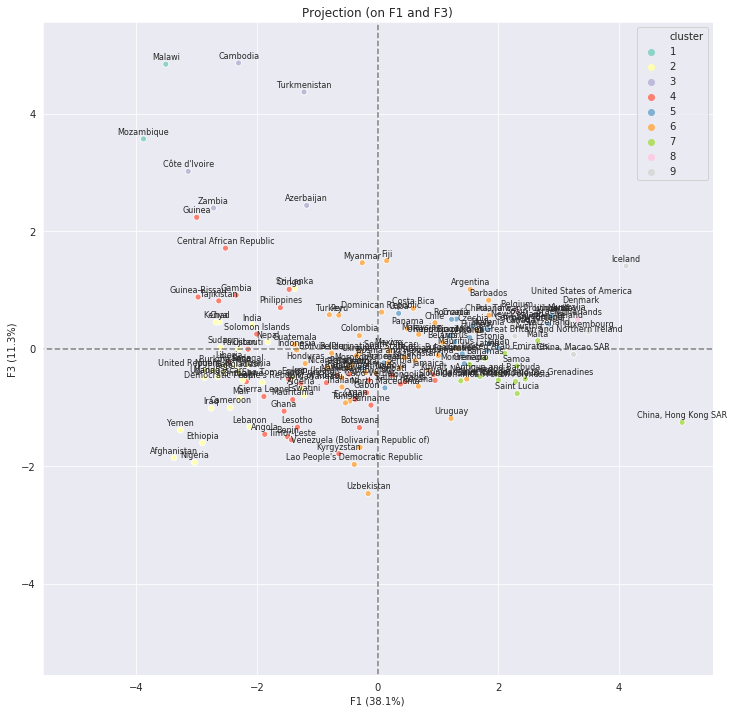

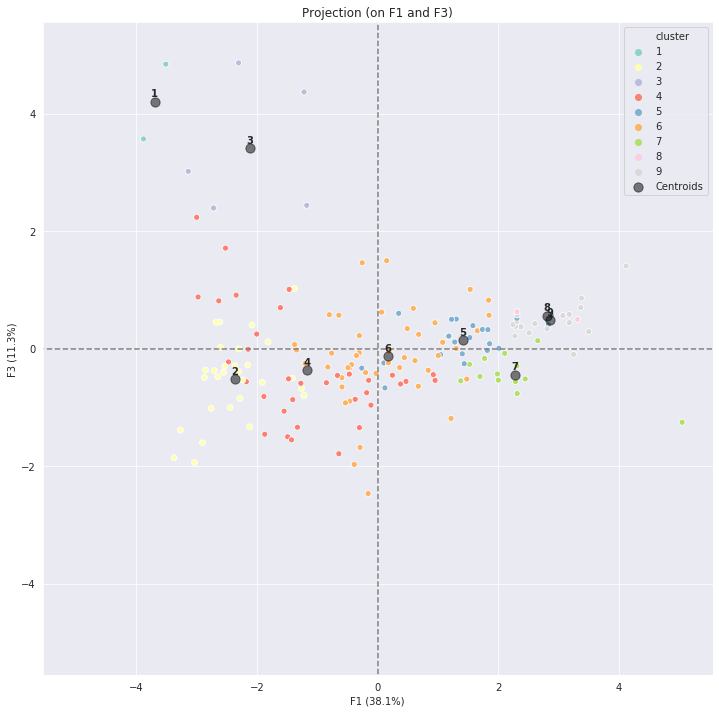

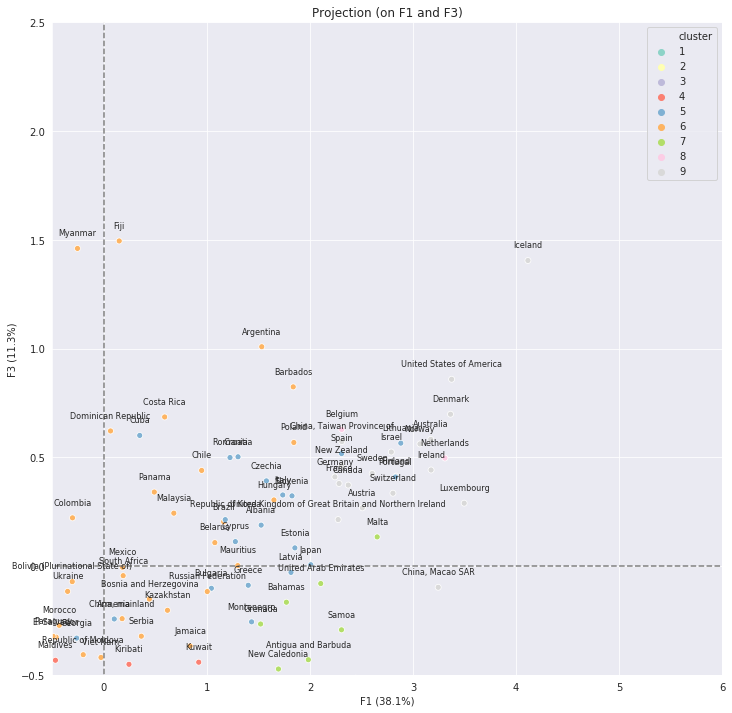

In [36]:
D = [(0, 2)]
display_factorial_planes(X_projected, n_comp, pca, D, labels=names, illustrative_var=df_X_projected.cluster)
display_factorial_planes(X_projected, n_comp, pca, D, illustrative_var=df_X_projected.cluster)
display_factorial_planes(X_projected, n_comp, pca, D, labels=names, illustrative_var=df_X_projected.cluster, lims=(-0.5,6,-0.5,2.5))

In [37]:
D = [(0, 3)]
display_factorial_planes(X_projected, n_comp, pca, D, labels=names, illustrative_var=df_X_projected.cluster)
display_factorial_planes(X_projected, n_comp, pca, D, illustrative_var=df_X_projected.cluster)
display_factorial_planes(X_projected, n_comp, pca, D, labels=names, illustrative_var=df_X_projected.cluster, lims=(-0.5,5,-2,0.5))

<h2>Analysis of the clusters</h2><a id='analysis'></a>

The Poultry market is a strong competitive market. The international Poultry market, whose growth is being powered by emerging countries, is focusing on cost rather than quality. Cost is therefore the strategic variable for success on the international markets. 

In poultry production, French farms are far more numerous and also far smaller than the ones from the main producers in Europe and outside (Brazil, USA, Thailand, China). In France, poultry farms have a smaller capacity because of the importance of quality and origin labels (Red Label, organic, Appellation d’Origine Contrôlée), whose product specifications limit the size of buildings. With farm sizes which don’t allow for economies of scale, and with labour costs well above some of its competitors, the French Poultry sector is facing severe challenges on exports. 

<br> With a “gourmet” image and high quality products, it is important to explore export markets with a clientele ready to pay for premium products. Countries with a higher level of development are preferred. 

In [38]:
data_country = pd.merge(data_country,df_X_projected[['country', 'cluster']])
data_country.pivot_table(index='cluster', values=data_country.columns[1:-1], aggfunc=np.mean).transpose()

cluster,1,2,3,4,5,6,7,8,9
dom_supply_poultry_tons,107000.000000,309379.310345,63800.000000,145823.529412,384000.000000,1.361255e+06,62692.307692,2.620000e+05,1.528737e+06
dom_supply_tons,24123.000000,79036.620690,16455.600000,10053.352941,25872.333333,1.285560e+05,1591.615385,4.129500e+04,8.391784e+04
export_poultry_over_domsupply,0.000000,0.242151,0.333333,3.846196,18.798983,1.076059e+01,19.969327,4.063809e+02,1.955831e+01
export_poultry_tons,0.000000,517.241379,200.000000,2764.705882,37000.000000,1.774468e+05,58230.769231,1.037000e+06,3.045789e+05
food_supply_kcalcapitaday,2473.500000,2468.241379,2635.200000,2550.941176,3203.904762,2.963532e+03,2829.153846,3.510500e+03,3.412737e+03
gdp_growth,-0.212600,4.888494,6.476758,-0.965760,8.914347,5.133545e+00,8.527601,1.779719e+00,5.217457e+00
gdp_percapita_usd,343.807895,1346.878486,2460.119302,3691.219114,12920.521664,5.521300e+03,15339.883132,3.533773e+04,4.416165e+04
growth_domsupply_poultry,274.154589,13.140139,30.448361,15.499333,9.201052,2.554070e+00,-1.117533,-3.797591e+00,5.130368e+00
growth_import_poultry,70.000000,-4.023267,648.000000,60.238935,22.904676,1.013116e+01,2.853494,2.021035e+01,1.417176e+01
import_poultry_over_domsupply,10.344828,10.399765,22.269717,92.707438,55.851518,9.745302e+00,113.206129,1.929046e+02,3.750335e+01


In [39]:
# data by clusters (group1, group2, etc.)
for n in range(num_clusters):
    group = 'group{}'.format(n+1)
    vars()[group] = data_country.loc[data_country['cluster']==n+1]   

<h3>Exportation to high-income developed countries</h3>

**Cluster 9 is our cluster of choice** witht the best country attributes regarding the level of development, net importations and growth of the local demand for Poultry products. 
<br>{{group9['country'].tolist()}}


The countries in Cluster 9 bordering on France are: Switzerland, Luxembourg, Germany and United Kingdom.
- **Switzerland**: the size of the market is not matching the expectations and there is a decrease of the Poultry imports in 2017. However due to the very close distance from France,  their high GDP per capita, and the significant size of their Poultry net importations, Switzerland stays in our selection.  
- **Luxembourg**: the size of the market is not matching the expectations. However due to the very close distance from France, their belonging to EU, their very high GDP per capita and their strong dependance to Poultry importations (0 local production), Luxembourg stays in our selection.  
- **United Kingdom**: there is a decrease of their importations (due to an increase of their production). However due to the very close distance from France, their belonging to EU and  the important size of their Poultry net importations (first Poultry Market in EU), United Kingdom stays in our selection. 

- **Germany**: no arbitrage required for Germany. It is a natural choice (matching all criterias) in our selection. See below.



In [40]:
eu_border_selected = ['Luxembourg', 'United Kingdom of Great Britain and Northern Ireland']
out_eu_border_selected =  ['Switzerland']

The best export candidates from Cluster 9 are shortlisted with the following attributes:
- minimum required within EU: net imports > 30 000 tons, growth > 2%, production < 90 % of the local demand
- minimum required outside EU: net imports > 150 000 tons, growth > 15%, production < 90 % of the local demand

In [41]:
X = group9
eu_export1 = X.loc[((X['euro_union'] == 'EU')  & (X['country'] !='France') 
                            & (X['net_import_poultry_tons'] >= 30000) &  (X['growth_import_poultry'] > 2) & (X['prod_poultry_over_domsupply'] < 90)) ]

eu_export1 = eu_export1.append(group9.loc[group9['country'].isin(eu_border_selected)])

eu_export1.transpose()

,8,50,142,155,168
country,Austria,Germany,Sweden,United Kingdom of Great Britain and Northern I...,Luxembourg
dom_supply_tons,19204,174960,16839,94597,766
food_supply_kcalcapitaday,3694,3559,3214,3428,3334
protein_supply_gcapitaday,108.11,104.07,107.03,103.87,105.79
pop_thousand,8819.9,82658.4,9904.9,66727.5,591.91
pop_growth,3.08212,1.82822,2.98274,2.68288,9.09577
gdp_percapita_usd,35788.4,33703.1,41323.4,32199.2,81059.3
gdp_growth,1.33546,3.93317,1.82975,2.08313,3.17848
political_stability_index,1.04,0.58,0.98,0.26,1.34
euro_union,EU,EU,EU,EU,EU


In [42]:
eu_export1_domsupply = int(eu_export1['dom_supply_poultry_tons'].sum())
eu_export1_import = int(eu_export1['import_poultry_tons'].sum())
eu_export1_netimport = int(eu_export1['net_import_poultry_tons'].sum())
eu_export1_gdpcapita = int(eu_export1['gdp_percapita_usd'].mean())

<h4>Exporting to European Countries highly facilitated</h4>

**EU selection from Cluster 9** 
<br>{{eu_export1['country'].tolist()}}


The EU selection of Cluster 9 should be the priority in terms of exports. Key figures about these 5 export countries: 
- a significant Poultry total market size of {{'{:,.0f}'.format(eu_export1_domsupply)}} tons (domestic supply).
- strong Poultry importations of {{'{:,.0f}'.format(eu_export1_import)}} tons due to production capacities not matching their domestic requirements.
- a high GDP per capita of {{'{:,.0f}'.format(eu_export1_gdpcapita)}} USD (average).

All these countries are easily accessible from France (simplifying the supply chain) and part of the EU (compliance to regulations or standards of the EU, import tariffs).

<h4>Exporting to non-EU developed countries</h4>

In [43]:
X = group9
outexport1 = X.loc[(X['net_import_poultry_tons'] >= 150000) & (X['growth_import_poultry'] > 15)& (X['prod_poultry_over_domsupply'] < 90) ]

out_eu_export1 = outexport1.append(group9.loc[group9['country'].isin(out_eu_border_selected)])

out_eu_export1.transpose()

,145,143
country,"China, Taiwan Province of",Switzerland
dom_supply_tons,25365,12871
food_supply_kcalcapitaday,2976,3414
protein_supply_gcapitaday,85.71,95.46
pop_thousand,23674.5,8455.8
pop_growth,1.08005,4.27835
gdp_percapita_usd,50593,60127.3
gdp_growth,15.4274,0.0962839
political_stability_index,0.89,1.21
euro_union,Outside EU,Outside EU


In [44]:
out_eu_export1_domsupply = int(out_eu_export1['dom_supply_poultry_tons'].sum())
out_eu_export1_import = int(out_eu_export1['import_poultry_tons'].sum())
out_eu_export1_gdpcapita = int(out_eu_export1['gdp_percapita_usd'].mean())

**Outside EU selection in Cluster 9**
<br>{{out_eu_export1['country'].tolist()}} 

**Switzerland** is not part of the EU but needs to remain a high priority objective in terms of exports due to the close distance (by road) with France and the bilateral trade agreements between France and Switzerland. Despite the decline of importations, Switzerland remains an attractive export opportunity with a significant market size due to an insufficient production. 

**Taiwan** is the second choice within non EU countries due to a high level of development, a significant volume of Poultry importations combined with a strong growth of the importations (38%). With a complex political relationship with China, EU countries are significant trade partners. 

 Key figures about these 2 selected countries: 
- a significant total Poultry market size of {{'{:,.0f}'.format(out_eu_export1_domsupply)}} tons (domestic supply).
- strong Poultry importations of {{'{:,.0f}'.format(out_eu_export1_import)}} tons due to production capacities not matching their domestic requirements.
- a high GDP per capita of {{'{:,.0f}'.format(out_eu_export1_gdpcapita)}} USD (average).

<h3>Exportation to isolated countries with a high dependance to importations</h3>

Cluster 7 is made of relatively small countries, islands or city-states with a very low Poultry production (if any).
<br>{{group7['country'].tolist()}}

2 french territories (French Polynesia and New Caledonia) are in the cluster 7. Doing business with those territories is highly facilitated for a French company, however these territories have not been selected due to their small market size, their lack of growth and the (extremely) long distance from France causing supply chain challenges. 

The best export candidates from Cluster 7 are shortlisted with the following attributes:
- minimum required within EU: net imports > 30 000 tons, growth > 2%, production < 90 % of the local demand
- minimum required outside EU: net imports > 150 000 tons, growth > 15%, production < 90 % of the local demand

In [45]:
X = group7
export2 = X.loc[((X['net_import_poultry_tons'] >= 150000) | (X['euro_union'] == 'EU') &  (X['net_import_poultry_tons'] >= 30000)) 
                 &  (X['growth_domsupply_poultry'] > 5) &  (X['growth_import_poultry'] > 10) ]

out_eu_export2 = export2.loc[export2['euro_union'] != 'EU']

export2.transpose()

,153
country,United Arab Emirates
dom_supply_tons,11795
food_supply_kcalcapitaday,3370
protein_supply_gcapitaday,107.26
pop_thousand,9487.2
pop_growth,3.1452
gdp_percapita_usd,30208.7
gdp_growth,2.95749
political_stability_index,0.63
euro_union,Outside EU


**Selection in Cluster 7** 
<br>{{out_eu_export2['country'].tolist()}}

**United Arab Emirates** presents an interesting business opportunity with a significant volume of importations ({{'{:,.0f}'.format(export2.import_poultry_tons.sum())}} tons), a significant growth of both importations and domestic supply and a high GDP per capita. In addition, the UAE are highly dependant on importations due to a very low production inferior to 15% (with limited possibilities for a change due to an extremely hot weather). 

<h3>Exportation to middle-income developed countries with a high Poultry consumption</h3>

Countries in Cluster 5 are mainly countries with middle-sized population (except Japan), a low or negative population growth and balanced level of development. 
<br>{{group5['country'].tolist()}}

Countries from cluster 5 are not preferred, only countries presenting an excellent business opportunity needs to be selected (if any).
<br>The best export candidates from Cluster 5 are shortlisted with the following attributes:
- minimum required within EU: net imports > 50 000 tons, growth > 2%, production < 90 % of the local demand
- minimum required outside EU: net imports > 200 000 tons, growth > 15%, production < 90 % of the local demand

In [47]:
X = group5
export3 = X.loc[(    (X['net_import_poultry_tons'] >= 200000) | (X['euro_union'] == 'EU') &  (X['net_import_poultry_tons'] >= 30000)) 
                 &  (X['growth_domsupply_poultry'] > 20) &  (X['growth_import_poultry'] > 10) ]

eu_export3 = export3.loc[export3['euro_union'] == 'EU']
out_eu_export3 = export3.loc[export3['euro_union'] != 'EU']

export3.transpose()

,30,116
country,Cuba,Czechia
dom_supply_tons,33585,20651
food_supply_kcalcapitaday,3409,3275
protein_supply_gcapitaday,88.4,86.48
pop_thousand,11339.3,10641
pop_growth,0.50104,0.514814
gdp_percapita_usd,5696.36,15459.6
gdp_growth,13.1521,10.9319
political_stability_index,0.69,1.02
euro_union,Outside EU,EU


**EU selection in Cluster 9** {{eu_export3.country.tolist()}}
<br>**Outside EU selection in Cluster 9** {{out_eu_export3.country.tolist()}} 

**Czechia** is a low profile candidate for exportation, however it is an interesting option to explore due to their belonging to the EU, and the significant growth of the Poultry internal demand ({{'{:,.0f}'.format(eu_export3.growth_domsupply_poultry.mean())}} % from 2013 to 2017) leading to a significant growth of their imports. 
<br>Caution: imporations from Poland (a lower-cost Poultry EU Exporter and closer geographically) are a threat due to the Czechia mid-range GDP per capita.

**Cuba** is not kept in the selection due to a combination of factors:
- GDP per capita is relatively low which is a challenge for premium products from France. 
- Cuba is geographically closed to the 2 largest Poultry exporters : Brazil and the USA. 
- There is a liquidity and currency risk due to the US sanctions. While China is now the main Cuba's business partner and lender, China is also a major Poultry exporter. 
- US sanctions are unpredictable (US presidents' political agenda) and applicable to French businesses due to extraterritorial US laws.  

In [48]:
out_eu_export3 = out_eu_export3[out_eu_export3.country != 'Cuba']

Note: Japan is the first worldwide market in terms of importations. It has been not included from the selection mainly due to a decline of their internal domestic supply (higher than their population decline) combined with a very strong increase of their Poultry production - +51% - during the same period (2013-2017). While their demand is decreasing, their production capacity is now exceeding 90%. Their production could meet in the future their internal demand.

<h3>Final selection: 6 EU countries and 3 non EU countries</h3>

In [49]:
eu_export = pd.concat([eu_export1, eu_export3])
out_eu_export = pd.concat([out_eu_export1, out_eu_export2, out_eu_export3])

**EU countries selected**: 
- high priority : {{eu_export1.country.tolist()}}
- low priority : {{eu_export3.country.tolist()}}

Key figures:
- total Population : {{'{:,.0f}'.format(eu_export.pop_thousand.sum()*1000)}} inhabitants
- total Poultry market size : {{'{:,.0f}'.format(eu_export.dom_supply_poultry_tons.sum())}} tons (domestic supply)
- total Poultry importations : {{'{:,.0f}'.format(eu_export.import_poultry_tons.sum())}} tons
- a high GDP per capita of {{'{:,.0f}'.format(eu_export.gdp_percapita_usd.mean())}} USD (average).

**Non EU countries selected**: 
- {{out_eu_export.country.tolist()}}

Key figures:
- total Population : {{'{:,.0f}'.format(out_eu_export.pop_thousand.sum()*1000)}} inhabitants
- total Poultry market size : {{'{:,.0f}'.format(out_eu_export.dom_supply_poultry_tons.sum())}} tons (domestic supply)
- total Poultry importations : {{'{:,.0f}'.format(out_eu_export.import_poultry_tons.sum())}} tons
- a high GDP per capita of {{'{:,.0f}'.format(out_eu_export.gdp_percapita_usd.mean())}} USD (average).

<hr>
<h2>Testing Hypothesis</h2>

In order to evaluate if the variable follows a normal distribution (gaussian distribution), we measure the difference between the repartition function of a normal distribution and the variable. 
- H0: F = F0 - F0 being a normal distribution
- H1: F!= F0

<h3>Shapiro test</h3>

In [52]:
for X in data_pca.columns: 
    print('{} (statistic, pvalue): {}'.format(X, stats.shapiro(data_country[X])))

pop_growth (statistic, pvalue): (0.9751194715499878, 0.003510316601023078)
gdp_percapita_usd (statistic, pvalue): (0.7042240500450134, 3.471553284665419e-17)
political_stability_index (statistic, pvalue): (0.9650869965553284, 0.00026085632271133363)
protein_supply_gcapitaday (statistic, pvalue): (0.9791442155838013, 0.010924579575657845)
protein_animal_over_protein (statistic, pvalue): (0.9566107988357544, 3.6603578337235376e-05)
protein_poultry_gcapitaday (statistic, pvalue): (0.9247508645057678, 8.814847518578972e-08)
net_import_poultry_over_domsupply (statistic, pvalue): (0.8746876120567322, 8.448142879702303e-11)
import_poultry_over_domsupply (statistic, pvalue): (0.8041080236434937, 6.448587188323182e-14)
growth_import_poultry (statistic, pvalue): (0.5605880618095398, 1.1040171225004988e-20)
growth_domsupply_poultry (statistic, pvalue): (0.6625531911849976, 2.599083995907715e-18)


Using a significance level of 0.01 (1%), we cannot reject the null hypothesis for 'protein_supply_gcapitaday' (pvalue>1%). We cannot reject the hypothesis that values of 'protein_supply_gcapitaday' in our dataset is following a normal distribution.

In [55]:
X = data_pca['protein_supply_gcapitaday']

<h3>Henry line</h3>

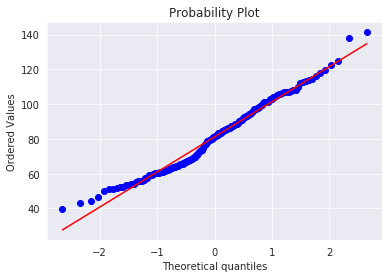

In [58]:
# Henry line 
stats.probplot(X, dist="norm", plot=pylab)
pylab.show()

The Henry line confirms the normal distribution for 'protein_supply_gcapitaday'.

<h3>Comparaison test between clusters</h3>

In [149]:
G = [group1, group2, group3, group4, group5, group6, group7, group8, group9]

a=[]
for z in G:
    a.append(list(z.protein_supply_gcapitaday))

In [152]:
b=[]
for k in range(len(a)):
    for i in range(len(a)):
        if i !=k and k < i:
                stat, pvalue = stats.bartlett(a[k], a[i])
                if pvalue < 0.05: 
                    print('group{} vs group {} ----------------------------------------------------------- statistic: {}, value: {}'.format(k+1, i+1, stat, pvalue))
                else: 
                    print('group{} vs group {} - null hypothesis not rejected (>5%) -  statistic: {}, value: {}'.format(k+1, i+1, stat, pvalue))

group1 vs group 2 - null hypothesis not rejected (>5%) -  statistic: 0.0018432453759119295, value: 0.965754915997107
group1 vs group 3 - null hypothesis not rejected (>5%) -  statistic: 0.1465275114451135, value: 0.7018761281738961
group1 vs group 4 - null hypothesis not rejected (>5%) -  statistic: 0.023907720179233174, value: 0.8771199438580107
group1 vs group 5 - null hypothesis not rejected (>5%) -  statistic: 0.027121268916160034, value: 0.8691916379926454
group1 vs group 6 - null hypothesis not rejected (>5%) -  statistic: 0.007119536911863323, value: 0.9327564164622709
group1 vs group 7 - null hypothesis not rejected (>5%) -  statistic: 0.3014913893094499, value: 0.5829489608082863
group1 vs group 8 - null hypothesis not rejected (>5%) -  statistic: 1.3818142836882725, value: 0.23979235045073397
group1 vs group 9 - null hypothesis not rejected (>5%) -  statistic: 0.00014013078456737504, value: 0.9905551145435494
group2 vs group 3 - null hypothesis not rejected (>5%) -  statistic

In [151]:
b=[]
for k in range(len(a)):
    for i in range(len(a)):
        if i !=k and k < i:
                stat, pvalue = stats.ttest_ind(a[k], a[i], equal_var=True)
                if pvalue < 0.05: 
                    print('group{} vs group {} ----------------------------------------------------------- statistic: {}, value: {}'.format(k+1, i+1, stat, pvalue))
                else: 
                    print('group{} vs group {} - null hypothesis not rejected (>5%) -  statistic: {}, value: {}'.format(k+1, i+1, stat, pvalue))

group1 vs group 2 - null hypothesis not rejected (>5%) -  statistic: -0.5996559289964785, value: 0.5533923769696384
group1 vs group 3 - null hypothesis not rejected (>5%) -  statistic: -1.0299068653021228, value: 0.3502734070372539
group1 vs group 4 - null hypothesis not rejected (>5%) -  statistic: -0.5693605891824682, value: 0.5728541032525105
group1 vs group 5 ----------------------------------------------------------- statistic: -3.8503805959197517, value: 0.0009285591341370467
group1 vs group 6 ----------------------------------------------------------- statistic: -2.509873543004566, value: 0.015579651763039382
group1 vs group 7 - null hypothesis not rejected (>5%) -  statistic: -2.026790273531105, value: 0.06370370880356957
group1 vs group 8 ----------------------------------------------------------- statistic: -5.0714285714285845, value: 0.036751156630003765
group1 vs group 9 ----------------------------------------------------------- statistic: -5.399984158567187, value: 3.2795

In [ ]:
data_country.to_csv(r'data/output/data_cluster.csv', index = False)